In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [2]:
X,y = make_moons(100,noise=0.25,random_state=2)

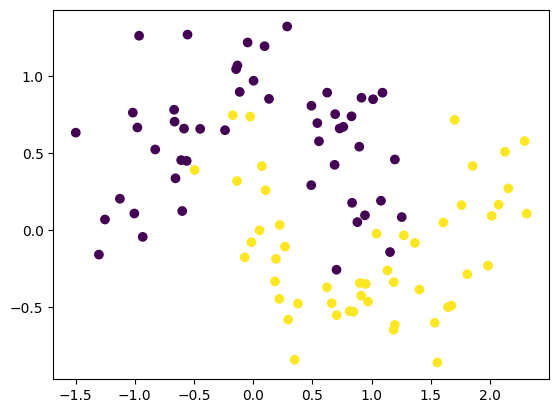

In [4]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [5]:
model_1 = Sequential()

model_1.add(Dense(128,input_dim=2,activation='relu'))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dense(1,activation='sigmoid'))

In [6]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
adam = Adam(learning_rate=0.01)
model_1.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
history = model_1.fit(X,y,epochs=2000,validation_split=0.2,verbose=0)

9600/9600 [==============================] - 17s 2ms/step


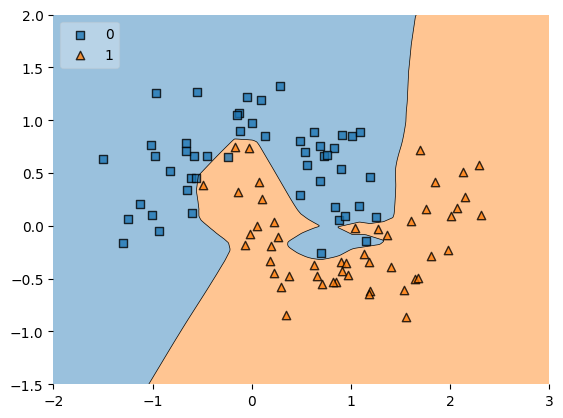

In [8]:
plot_decision_regions(X,y.astype('int'),clf=model_1,legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

In [9]:
# So we can clearly see that see that, the model has overfitting over the trainning data

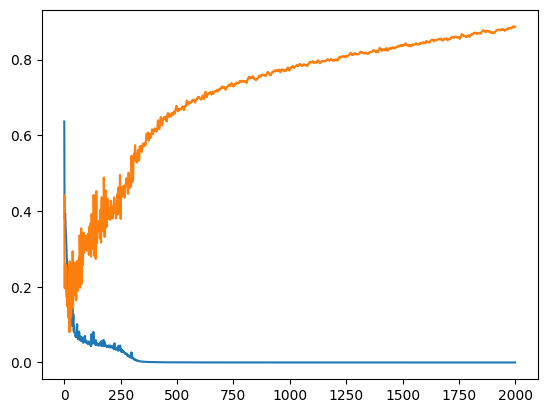

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [11]:
# Applying L2 regularization

model_2 = Sequential()

model_2.add(Dense(128,input_dim=2,activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model_2.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.03)))
model_2.add(Dense(1,activation='sigmoid'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
adam = Adam(learning_rate=0.01)
model_2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history_2 = model_2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 14s 1ms/step


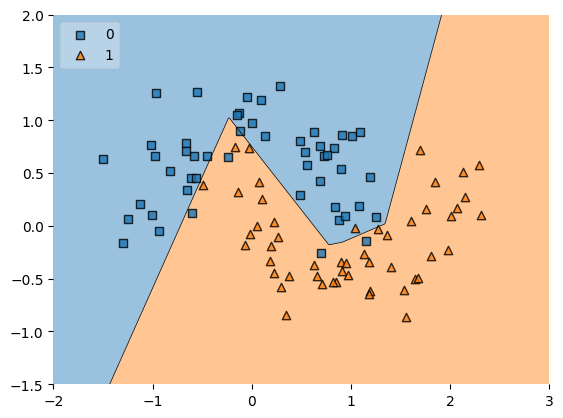

In [13]:
plot_decision_regions(X, y.astype('int'), clf=model_2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

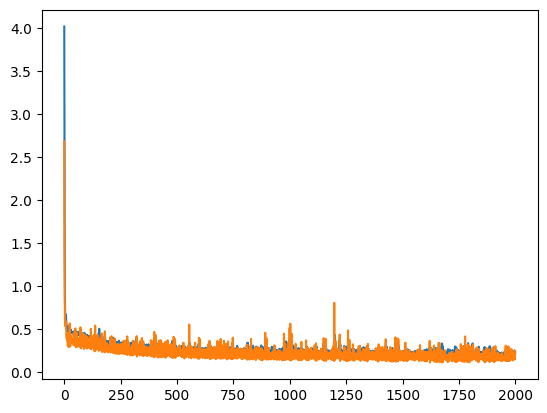

In [14]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

In [15]:
# Now we can see that overfitting is rediced after applying L2 regularization

In [18]:
model_1.get_weights()[0].shape

(2, 128)

In [21]:
m1 = model_1.get_weights()[0].reshape(256)
m2 = model_2.get_weights()[0].reshape(256)

<Axes: >

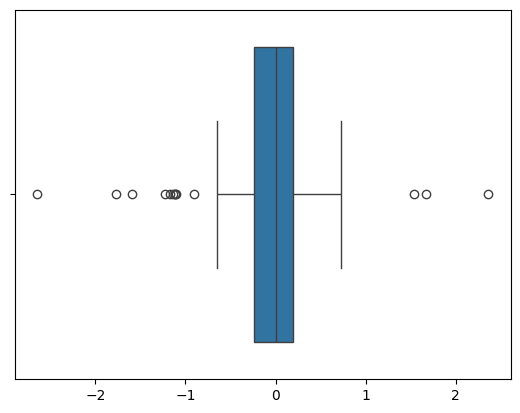

In [23]:
sns.boxplot(x = m1)

<Axes: >

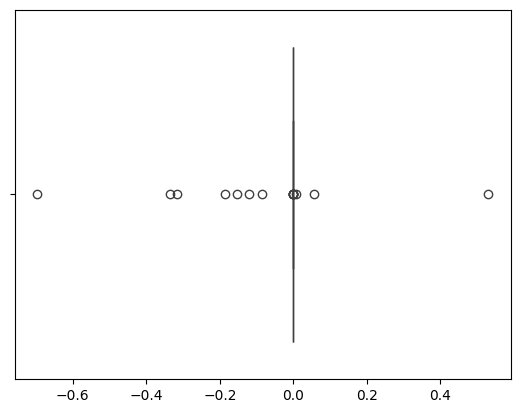

In [24]:
sns.boxplot(x = m2)

In [25]:
m1.min()

-2.6425097

In [27]:
m2.min()

-0.6960213

In [28]:
m1.max()

2.3599784

In [29]:
m2.max()

0.5302478

<ipython-input-31-98474e309e50>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(m1)
<ipython-input-31-98474e309e50>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(m2)


<Axes: ylabel='Density'>

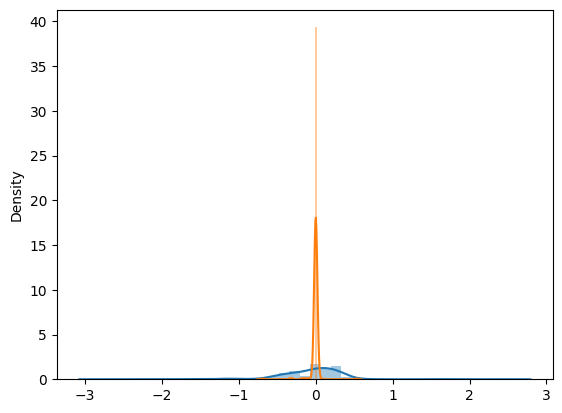

In [31]:
sns.distplot(m1)
sns.distplot(m2)

In [33]:
# Applying L1 regularization

model_3 = Sequential()

model_3.add(Dense(128,input_dim=2,activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model_3.add(Dense(128,activation='relu',kernel_regularizer=tensorflow.keras.regularizers.l2(0.001)))
model_3.add(Dense(1,activation='sigmoid'))
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
adam = Adam(learning_rate=0.01)
model_3.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history_3 = model_3.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 [==============================] - 14s 1ms/step


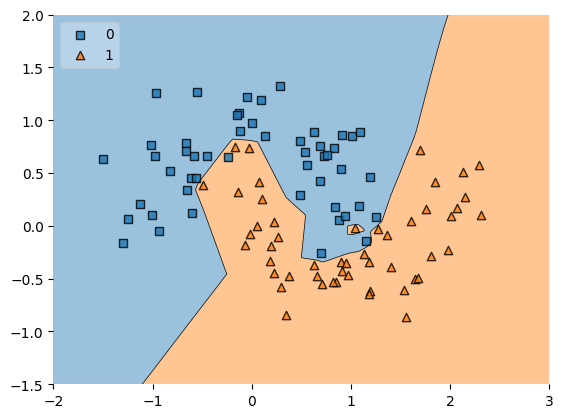

In [35]:
plot_decision_regions(X, y.astype('int'), clf=model_3, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

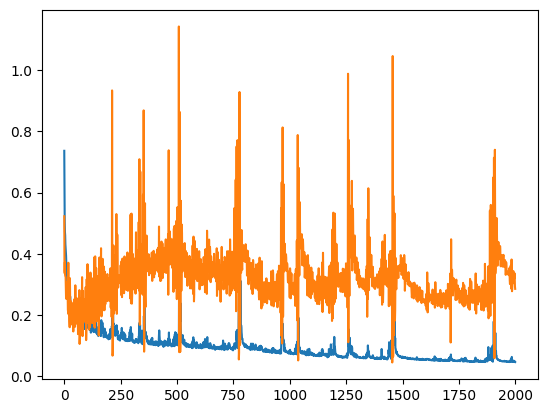

In [36]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])

In [37]:
# So, we can say that, L2 perform better than L1